In [1]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\keena\Documents\University\python_scripts")

from Function_files.addresses import Init_Directories
import Function_files.data_functions as dat
from Function_files.fitting_functions import fit_exp_decay, exp_decay
from Function_files.plotting_class import Plotter

plt = Plotter()
dirs = Init_Directories()

dirs.current = dirs.join(dirs.code, "Lifetime\T1\SP")
json = dirs.join(dirs.current, "configs", "08_SP.json")
info = dat.read_json(json)

In [2]:
# path to folders containing T1 data
path = dirs.join(dirs.base, r"desktop\single_photon")
folder_list, file_list = dat.dir_interrogate(path, extensions=info['extensions'], exceptions=info['exceptions'])
phu_paths = dat.search_paths(folder_list, file_list, include=['.phu'])
phu_path_list = [[dirs.join(path, x) for x in phu_path] for phu_path in phu_paths]
dat_paths = dat.search_paths(folder_list, file_list, include=['.dat'])
dat_path_list = [dirs.join(path, x) for x in dat_paths]
ptu_paths = dat.search_paths(folder_list, file_list, include=['.ptu'])
ptu_path_list = [dirs.join(path, x) for x in ptu_paths]

In [3]:
# TODO add function to extract data from .dat files including the metadata (length, bin width etc.)
dat_data = [dat.read_file(x) for x in dat_path_list]
dat_ttd = [x[1][0] for x in dat_data]

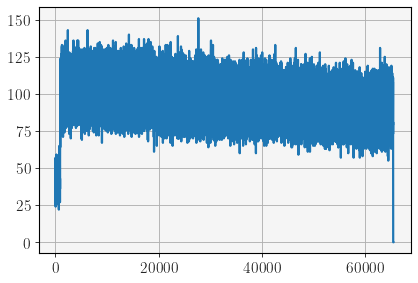

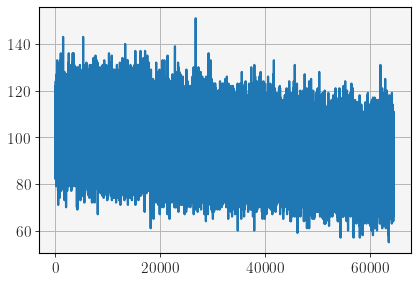

In [4]:
import matplotlib.pyplot as mp
import numpy as np
first = 950
last = 65433
fig, ax = mp.subplots()
ax.plot(dat_ttd[0][4:])
fig, ax = mp.subplots()
ax.plot(dat_ttd[0][first:last])

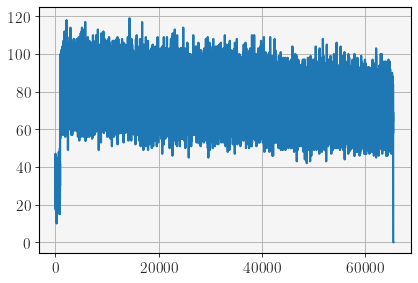

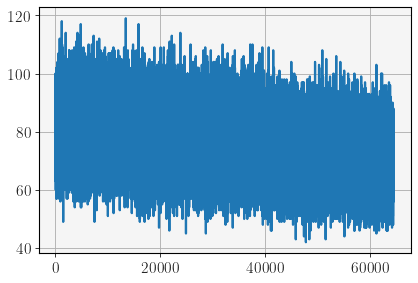

In [5]:
import matplotlib.pyplot as mp
import numpy as np
fig, ax = mp.subplots()
ax.plot(dat_ttd[1][4:])
fig, ax = mp.subplots()
ax.plot(dat_ttd[1][first:last])

In [6]:
stitched = dat_ttd[0][first:last]
[stitched.extend(dat_ttd[x][first:last]) for x in range(1, len(dat_ttd))]
dt = 512E-12
time = [dt*1E6*x for x in range(len(stitched))]

[Text(0.5, 1.0, 'PrYSO Bulk Fluorescence (SP)')]

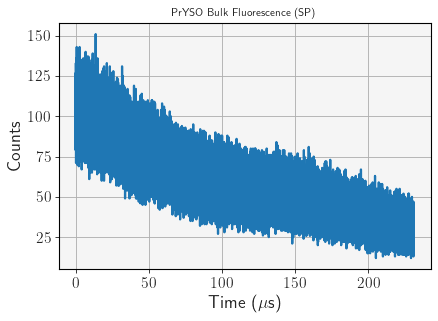

In [7]:
# TODO add functionality to autodetect edges between stitches and smooth together

fig, ax = mp.subplots()
ax.plot(time, stitched)
ax.set(xlabel=('Time ($\\mu$s)'),  ylabel=('Counts'))
ax.set(title=('PrYSO Bulk Fluorescence (SP)'))

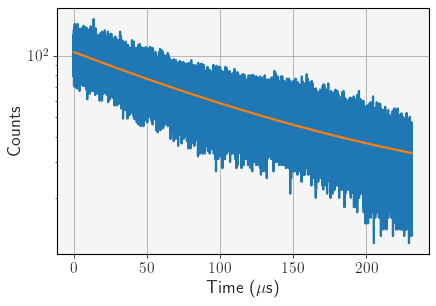

In [8]:
try_fit = fit_exp_decay(time, stitched)
fig, ax = mp.subplots()
ax.plot(time, stitched)
ax.set(xlabel=('Time ($\\mu$s)'),  ylabel=('Counts'))
ax.set_yscale('log')
#ax.set(title=('PrYSO Bulk Fluorescence (SP)'))
ax.plot(time, exp_decay(np.array(time), *try_fit[0]))
#fig.savefig(fname=dirs.join(dirs.current, 'stitched.svg'), dpi=80, format='svg', bbox_inches='tight')

In [9]:
# path to folders containing T1 data
path = dirs.join(dirs.base, r"Desktop\SP\0208\606_BP")
folder_list, file_list = dat.dir_interrogate(path, extensions=info['extensions'], exceptions=info['exceptions'])
phu_paths = dat.search_paths(folder_list, file_list, include=['.phu'])
phu_path_list = [[dirs.join(path, x) for x in phu_path] for phu_path in phu_paths]

dat_paths = dat.search_paths(folder_list, file_list, include=['.dat'])
dat_path_list = [[dirs.join(path, x) for x in dat_path] for dat_path in dat_paths]

ptu_paths = dat.search_paths(folder_list, file_list, include=['.ptu'])
ptu_path_list = [[dirs.join(path, x) for x in ptu_path] for ptu_path in ptu_paths]

dt = 4.096E-3
dat_data = [[dat.read_file(x) for x in dat_path] for dat_path in dat_path_list]
dat_ttd = [[x[1][0] for x in data] for data in dat_data]
time = [[dt * np.arange(len(x)) for x in data] for data in dat_ttd]

[Text(0.5, 1.0, 'PrYSO Bulk Fluorescence (SP)')]

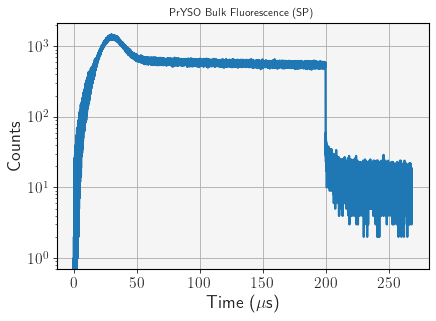

In [74]:
a, b = plt.zoom(time[0][0], (0, 0.05))
m = 6 # power
n = 0 # polarisation
fig, ax = mp.subplots()
ax.plot(time[m][n][b:], dat_ttd[m][n][b:])
ax.set_yscale('log')
ax.set(xlabel=('Time ($\\mu$s)'), ylabel=('Counts'))
ax.set(title=('PrYSO Bulk Fluorescence (SP)'))

[Text(0.5, 1.0, 'PrYSO Bulk Fluorescence (SP)')]

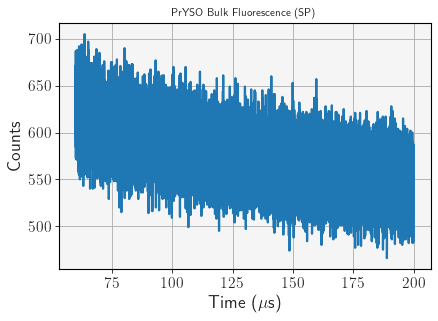

In [77]:
a, b = plt.zoom(time[0][0], (60, 200))
fig, ax = mp.subplots()
ax.plot(time[m][n][a:b], dat_ttd[m][n][a:b])
ax.set(xlabel=('Time ($\\mu$s)'), ylabel=('Counts'))
ax.set(title=('PrYSO Bulk Fluorescence (SP)'))

In [78]:
guess = [np.max(dat_ttd[m][n][a:b]), 160, np.min(dat_ttd[m][n][a:b])]
try_fit = fit_exp_decay(time[m][n][a:b], dat_ttd[m][n][a:b], params=guess)
try_fit[0][1], try_fit[1][1]

(np.float64(125.18403027234288), np.float64(5.388917461960283))

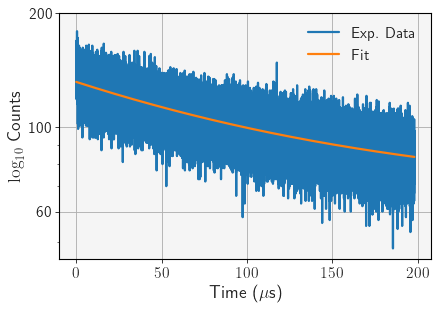

In [73]:
fig, ax = mp.subplots()
time_plot = dt * np.arange(len(time[m][n][a:b]))
ax.plot(time_plot, dat_ttd[m][n][a:b], label='Exp. Data')
ax.plot(time_plot, exp_decay(np.array(time[m][n][a:b]), *try_fit[0]), label='Fit')
ax.set(xlabel=('Time ($\\mu$s)'),  ylabel=('$\log_1$$_0$ Counts'))
ax.set_yscale('log')
yticks = [60, 100, 200]
ax.legend(loc='upper right')
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])
fig.savefig(fname=dirs.join(dirs.current, 'low_T1_BP_FAV.svg'), dpi=80, format='svg', bbox_inches='tight')